Crude Oil Prices Prediction

IMPORT LIBRARIES

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
# from sklearn.metrics import accuracy_score,plot_roc_curve
# from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import r2_score
# from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

IMPORT DATASET, REMOVE NA VALUES

In [68]:
df=pd.read_csv('/content/oil.csv')
df.dropna(inplace = True)
df

,Date,Closing Value
0,1/2/1986,25.56
1,1/3/1986,26.00
2,1/6/1986,26.53
3,1/7/1986,25.85
4,1/8/1986,25.87
...,...,...
8217,7/2/2018,73.89
8218,7/3/2018,74.19
8220,7/5/2018,73.05
8221,7/6/2018,73.78


In [ ]:
SPLIT DATE MONTH AND YEAR INTO 3 COLUMNS

In [4]:
# new data frame with split value columns
new = df["Date"].str.split("/", n = 2, expand = True)
  
# making separate first name column from new data frame
df["date"]= new[0]
  
# making separate last name column from new data frame
df["Month"]= new[1]
df["Year"]= new[2]
# Dropping old Name columns
df.drop(columns =["Date"], inplace = True)
  
# df display
df

,Closing Value,date,Month,Year
0,25.56,1,2,1986
1,26.00,1,3,1986
2,26.53,1,6,1986
3,25.85,1,7,1986
4,25.87,1,8,1986
...,...,...,...,...
8217,73.89,7,2,2018
8218,74.19,7,3,2018
8220,73.05,7,5,2018
8221,73.78,7,6,2018


In [45]:
df["Closing Value"]

0       25.56
1       26.00
2       26.53
3       25.85
4       25.87
        ...  
8217    73.89
8218    74.19
8220    73.05
8221    73.78
8222    73.93
Name: Closing Value, Length: 8216, dtype: float64

[link text](https://)DIVIDE DEPENDANT AND INDEPENDENT VARIABLES

In [5]:
X=df.iloc[:,1:].values
Y=df.iloc[:,0].values
X.dtype

dtype('O')

DIVIDE INTO TEST SET AND TRAIN SET

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

APPLY LINEAR REGRESSION

In [7]:
regressor = LinearRegression()    
regressor.fit(x_train, y_train)    

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

PREDICTION - LINEAR REGRESSION

In [8]:
y_pred=regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 5.58 11.88]
 [71.51 97.18]
 [16.56 37.04]
 ...
 [45.61 30.01]
 [11.92 17.32]
 [21.03 22.  ]]


CALCULATE R2_SCORE - LINEAR REGRESSION

In [9]:
r1 = r2_score(y_test,y_pred)
r1

0.5738016561080482



```
# This is formatted as code
```

MEAN SQUARE ERROR - LINEAR REGRESSION

In [10]:
mse1=mean_squared_error(y_test,y_pred) 
mse1

374.55278659676566

ROOT MEAN SQUARE ERROR

In [11]:
rmse1=mean_squared_error(y_test, y_pred, squared=False)
rmse1

19.353366285914337

MEAN ABSOLUTE ERROR

In [12]:
mae1=mean_absolute_error(y_test, y_pred)
mae1

15.432079765283875

DECISION TREE REGRESSION

In [13]:
dec_regressor = DecisionTreeRegressor(max_depth=4)
dec_regressor.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [14]:
y_pred1=dec_regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred1.reshape(len(y_pred1),1), y_test.reshape(len(y_test),1)),1))

[[15.11 11.88]
 [87.74 97.18]
 [21.51 37.04]
 ...
 [31.21 30.01]
 [21.51 17.32]
 [21.51 22.  ]]


In [15]:
r2 = r2_score(y_test,y_pred1)
r2

0.9047892679026014

In [16]:
mse2=mean_squared_error(y_test,y_pred1) 
mse2

83.67335427760258

In [17]:
rmse2=mean_squared_error(y_test, y_pred1, squared=False)
rmse2

9.147314047172678

In [18]:
mae2=mean_absolute_error(y_test, y_pred1)
mae2

5.063809031087601

RANDOM FOREST REGRESSION

In [19]:
rand_forest_model =  RandomForestRegressor(n_estimators = 1000 , max_features = 2, oob_score = True ,  random_state = 115)
rand_forest_model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=2, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=True,
                      random_state=115, verbose=0, warm_start=False)

In [20]:
import pickle

# Save the trained model as a pickle string.
saved_model = pickle.dumps(rand_forest_model)

# Load the pickled model
rand_forest_model = pickle.loads(saved_model)

# Use the loaded pickled model to make predictions
rand_forest_model.predict(x_test)


array([12.38, 96.39, 33.95, ..., 32.1 , 17.85, 21.82])

In [21]:
y_pred2=rand_forest_model.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_test.reshape(len(y_test),1)),1))

[[12.38 11.88]
 [96.39 97.18]
 [33.95 37.04]
 ...
 [32.1  30.01]
 [17.85 17.32]
 [21.82 22.  ]]


In [22]:
r3 = r2_score(y_test,y_pred2)
r3

0.9975985629701171

In [23]:
mse3=mean_squared_error(y_test,y_pred2) 
mse3

2.110437415513127

In [24]:
rmse3=mean_squared_error(y_test, y_pred2, squared=False)
rmse3

1.4527344614598798

In [25]:
mae3=mean_absolute_error(y_test, y_pred2)
mae3

0.872917688564475

SUPPORT VECTOR REGRESSION

In [26]:
dataset = pd.read_csv('/content/oil.csv')
dataset.dropna(inplace = True)
dataset

# new data frame with split value columns
new = dataset["Date"].str.split("/", n = 2, expand = True)
  
# making separate first name column from new data frame
dataset["date"]= new[0]
  
# making separate last name column from new data frame
dataset["Month"]= new[1]
dataset["Year"]= new[2]
# Dropping old Name columns
dataset.drop(columns =["Date"], inplace = True)
  
# df display
dataset


,Closing Value,date,Month,Year
0,25.56,1,2,1986
1,26.00,1,3,1986
2,26.53,1,6,1986
3,25.85,1,7,1986
4,25.87,1,8,1986
...,...,...,...,...
8217,73.89,7,2,2018
8218,74.19,7,3,2018
8220,73.05,7,5,2018
8221,73.78,7,6,2018


In [27]:
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

y = y.reshape(len(y),1)
print(y)

[[25.56]
 [26.  ]
 [26.53]
 ...
 [73.05]
 [73.78]
 [73.93]]


In [28]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)
print(X)
print(y)

[[-1.6  -1.57 -1.67]
 [-1.6  -1.45 -1.67]
 [-1.6  -1.11 -1.67]
 ...
 [ 0.15 -1.22  1.73]
 [ 0.15 -1.11  1.73]
 [ 0.15 -0.77  1.73]]
[[-0.61]
 [-0.59]
 [-0.57]
 ...
 [ 1.  ]
 [ 1.02]
 [ 1.03]]


In [29]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [30]:
y_pred3=sc_y.inverse_transform(regressor.predict(sc_X.transform(x_test)))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred3.reshape(len(y_pred3),1), y_test.reshape(len(y_test),1)),1))

[[14.49 11.88]
 [81.23 97.18]
 [21.41 37.04]
 ...
 [34.5  30.01]
 [19.41 17.32]
 [22.09 22.  ]]


In [31]:
r4 = r2_score(y_test,y_pred3)
r4

0.8337801329367251

In [32]:
mse4=mean_squared_error(y_test,y_pred3)
mse4

146.07779520625493

In [33]:
rmse4=mean_squared_error(y_test, y_pred3, squared=False)
rmse4

12.086264733417638

In [34]:
mae4=mean_absolute_error(y_test, y_pred3)
mae4

7.642629787816245

GRAPHICAL REPRESENTATION

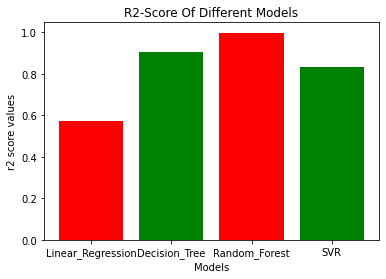

In [35]:
left = [1, 2, 3, 4]
height = [r1,r2,r3,r4]
tick_label = ['Linear_Regression', 'Decision_Tree', 'Random_Forest', 'SVR']
plt.bar(left, height, tick_label = tick_label, width = 0.8, color = ['red', 'green'])
plt.xlabel('Models')
plt.ylabel('r2 score values')
plt.title('R2-Score Of Different Models')
plt.show()


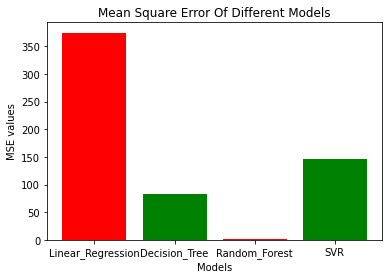

In [36]:
left = [1, 2, 3, 4]
height = [mse1,mse2,mse3,mse4]
tick_label = ['Linear_Regression', 'Decision_Tree', 'Random_Forest', 'SVR']
plt.bar(left, height, tick_label = tick_label, width = 0.8, color = ['red', 'green'])
plt.xlabel('Models')
plt.ylabel('MSE values')
plt.title('Mean Square Error Of Different Models')
plt.show()


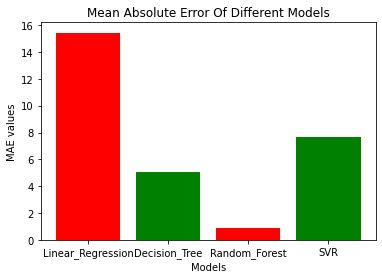

In [37]:
left = [1, 2, 3, 4]
height = [mae1,mae2,mae3,mae4]
tick_label = ['Linear_Regression', 'Decision_Tree', 'Random_Forest', 'SVR']
plt.bar(left, height, tick_label = tick_label, width = 0.8, color = ['red', 'green'])
plt.xlabel('Models')
plt.ylabel('MAE values')
plt.title('Mean Absolute Error Of Different Models')
plt.show()


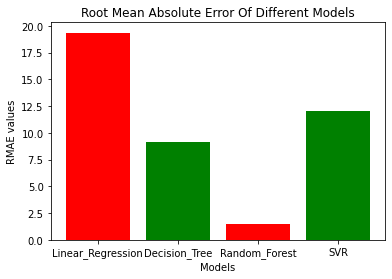

In [38]:
left = [1, 2, 3, 4]
height = [rmse1,rmse2,rmse3,rmse4]
tick_label = ['Linear_Regression', 'Decision_Tree', 'Random_Forest', 'SVR']
plt.bar(left, height, tick_label = tick_label, width = 0.8, color = ['red', 'green'])
plt.xlabel('Models')
plt.ylabel('RMAE values')
plt.title('Root Mean Absolute Error Of Different Models')
plt.show()

testing for other values

In [63]:
test_dtm={}
# test_dtm['Predicted Price']=[]
test_dtm['date']=[1,2,3,4,5]
test_dtm['Month']=[5,6,7,8,9]
test_dtm['Year']=[2022,2023,2024,2025,2026]
test_dtm = pd.DataFrame.from_dict(test_dtm)

In [64]:
pred = rand_forest_model.predict(test_dtm)
test_dtm['Predicted Price'] = pred
# test_dtm.to_csv('/content/test')
test_dtm


,date,Month,Year,Predicted Price
0,1,5,2022,61.50298
1,2,6,2023,63.21445
2,3,7,2024,61.48567
3,4,8,2025,63.79553
4,5,9,2026,70.80666


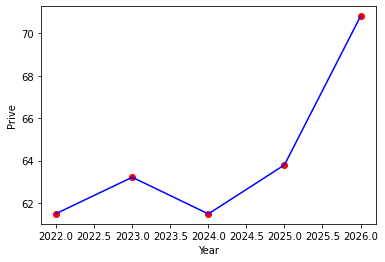

In [59]:
plt.scatter(test_dtm['Year'], test_dtm['Predicted Price'], color = 'red')
plt.plot(test_dtm['Year'], test_dtm['Predicted Price'], color = 'blue')
plt.xlabel('Year')
plt.ylabel('Prive')
plt.show()

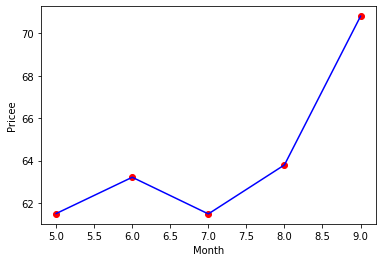

In [69]:
plt.scatter(test_dtm['Month'], test_dtm['Predicted Price'], color = 'red')
plt.plot(test_dtm['Month'], test_dtm['Predicted Price'], color = 'blue')
plt.xlabel('Month')
plt.ylabel('Pricee')
plt.show()